In [1]:
## Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Read roll call votes from csv into data frame

df_roll_votes = pd.read_csv('Data\\114th Senate Roll Call Votes.csv', index_col=0)
df_roll_votes = df_roll_votes.sort_values('rollnumber', ascending='False').reset_index(drop=True)
df_roll_votes.head()

,icpsr,id,name,state_abbrev,vote,party_code,rollcallvote_id,chamber,congress,date,rollnumber,description
0,14852,MS11414852,"ROBERTS, Charles Patrick (Pat)",KS,6,200,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
1,41305,MS11441305,"KAINE, Timothy Michael (Tim)",VA,1,100,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
2,41304,MS11441304,"CRUZ, Rafael Edward (Ted)",TX,6,200,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
3,41303,MS11441303,"HEITKAMP, Mary Kathryn (Heidi)",ND,6,100,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
4,41302,MS11441302,"FISCHER, Debra (Deb)",NE,6,200,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.


In [3]:
# Mapping votes to 'Yea' (from 1), 'Nay' (from 6), 'Abs' (from 7 or 9)
# Mapping party codes for Democrats to 'D' (from 100), for Independents to 'D' (from 328; doing this 
# since both Sens. King and Sanders caucus with Democrats), and for Republicans to 'R' (from 200)

votemap = {1:'Yea', 6:'Nay', 7:'Abs', 9:'Abs'}
partycodemap = {100:'D', 328:'D', 200:'R'}
df_roll_votes['vote'] = df_roll_votes['vote'].map(votemap)
df_roll_votes['party_code'] = df_roll_votes['party_code'].map(partycodemap)
df_roll_votes.head()

,icpsr,id,name,state_abbrev,vote,party_code,rollcallvote_id,chamber,congress,date,rollnumber,description
0,14852,MS11414852,"ROBERTS, Charles Patrick (Pat)",KS,Nay,R,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
1,41305,MS11441305,"KAINE, Timothy Michael (Tim)",VA,Yea,D,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
2,41304,MS11441304,"CRUZ, Rafael Edward (Ted)",TX,Nay,R,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
3,41303,MS11441303,"HEITKAMP, Mary Kathryn (Heidi)",ND,Nay,D,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
4,41302,MS11441302,"FISCHER, Debra (Deb)",NE,Nay,R,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.


In [4]:
# Pivot on 'name' to create dataframe of senators and their roll votes

df_pivoted = df_roll_votes.pivot(index='name', columns='rollnumber', values='vote')
df_pivoted.columns = df_pivoted.columns.astype(str)
df_pivoted.head()

rollnumber,1,2,3,4,5,6,7,8,9,10,...,493,494,495,496,497,498,499,500,501,502
name,,,,,,,,,,,,,,,,,,,,,
"ALEXANDER, Lamar",Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
"AYOTTE, Kelly",Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
"BALDWIN, Tammy",Yea,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea
"BARRASSO, John A.",Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
"BENNET, Michael F.",Nay,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea


In [5]:
# Create a list of senators and their party

df_party_id = df_roll_votes.drop_duplicates(['name', 'party_code'])
df_party_id = df_party_id[['name', 'party_code']]
df_party_id.head()

,name,party_code
0,"ROBERTS, Charles Patrick (Pat)",R
1,"KAINE, Timothy Michael (Tim)",D
2,"CRUZ, Rafael Edward (Ted)",R
3,"HEITKAMP, Mary Kathryn (Heidi)",D
4,"FISCHER, Debra (Deb)",R


In [6]:
# Add senator's party to dataframe with all of their roll votes

df_votes = pd.merge(df_party_id, df_pivoted, on='name', how='inner')
df_votes.head()

,name,party_code,1,2,3,4,5,6,7,8,...,493,494,495,496,497,498,499,500,501,502
0,"ROBERTS, Charles Patrick (Pat)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
1,"KAINE, Timothy Michael (Tim)",D,Yea,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,"CRUZ, Rafael Edward (Ted)",R,Nay,Yea,Yea,Yea,Yea,Nay,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea
3,"HEITKAMP, Mary Kathryn (Heidi)",D,Nay,Yea,Yea,Yea,Nay,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea
4,"FISCHER, Debra (Deb)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea


In [7]:
# Read supplementary information from csv into dataframe

df_supp_info = pd.read_csv('Data\\Supplementary Senator Info.csv')
df_supp_info.head()

,name,age,gender,urban_rural,born_in_state
0,"ROBERTS, Charles Patrick (Pat)",78,Male,Rural,Yes
1,"KAINE, Timothy Michael (Tim)",56,Male,Urban,No
2,"CRUZ, Rafael Edward (Ted)",44,Male,Urban,No
3,"HEITKAMP, Mary Kathryn (Heidi)",59,Female,Rural,No
4,"FISCHER, Debra (Deb)",63,Female,Rural,Yes


In [8]:
# Merge voting information dataframe with supplementary information dataframe

df_unstandardized = pd.merge(df_votes, df_supp_info, on='name', how='inner')
df_unstandardized.head()

,name,party_code,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,age,gender,urban_rural,born_in_state
0,"ROBERTS, Charles Patrick (Pat)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,78,Male,Rural,Yes
1,"KAINE, Timothy Michael (Tim)",D,Yea,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Yea,Yea,Yea,56,Male,Urban,No
2,"CRUZ, Rafael Edward (Ted)",R,Nay,Yea,Yea,Yea,Yea,Nay,Yea,Nay,...,Yea,Yea,Nay,Nay,Yea,Yea,44,Male,Urban,No
3,"HEITKAMP, Mary Kathryn (Heidi)",D,Nay,Yea,Yea,Yea,Nay,Yea,Nay,Nay,...,Yea,Yea,Nay,Nay,Yea,Yea,59,Female,Rural,No
4,"FISCHER, Debra (Deb)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,63,Female,Rural,Yes


In [9]:
# One-hot encode categorical variables

num_roll_votes = df_roll_votes['rollnumber'].max()
dummy_col_nums = ['%d' % index for index in range(1,num_roll_votes+1)]
dummy_cols = dummy_col_nums + ['gender', 'urban_rural', 'born_in_state']
df_unstandardized_dummies = pd.get_dummies(df_unstandardized, prefix=dummy_cols, columns=dummy_cols)
df_unstandardized_dummies.head()

,name,party_code,age,1_Abs,1_Nay,1_Yea,2_Abs,2_Nay,2_Yea,3_Abs,...,501_Yea,502_Abs,502_Nay,502_Yea,gender_Female,gender_Male,urban_rural_Rural,urban_rural_Urban,born_in_state_No,born_in_state_Yes
0,"ROBERTS, Charles Patrick (Pat)",R,78,0,1,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1
1,"KAINE, Timothy Michael (Tim)",D,56,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,1,0
2,"CRUZ, Rafael Edward (Ted)",R,44,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,1,1,0
3,"HEITKAMP, Mary Kathryn (Heidi)",D,59,0,1,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
4,"FISCHER, Debra (Deb)",R,63,0,1,0,0,0,1,0,...,1,0,0,1,1,0,1,0,0,1


In [10]:
# Standardize age column before doing KNN

senator_age = df_unstandardized_dummies['age'].astype(float)
senator_age_standardized = pd.DataFrame(preprocessing.scale(senator_age), columns=['age'])

df_standardized = pd.concat([df_unstandardized_dummies[['name', 'party_code']], senator_age_standardized, df_unstandardized_dummies.iloc[:,3:]], axis=1)
df_standardized.head()

,name,party_code,age,1_Abs,1_Nay,1_Yea,2_Abs,2_Nay,2_Yea,3_Abs,...,501_Yea,502_Abs,502_Nay,502_Yea,gender_Female,gender_Male,urban_rural_Rural,urban_rural_Urban,born_in_state_No,born_in_state_Yes
0,"ROBERTS, Charles Patrick (Pat)",R,1.636745,0,1,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1
1,"KAINE, Timothy Michael (Tim)",D,-0.447074,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,1,0
2,"CRUZ, Rafael Edward (Ted)",R,-1.583703,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,1,1,0
3,"HEITKAMP, Mary Kathryn (Heidi)",D,-0.162917,0,1,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
4,"FISCHER, Debra (Deb)",R,0.215959,0,1,0,0,0,1,0,...,1,0,0,1,1,0,1,0,0,1


In [11]:
# Separate labels and features and convert into numpy arrays

# Create labels as numpy array
label_headers = ['name', 'party_code']
labels_arrays = np.array(df_standardized[label_headers])

# Create features as numpy array
feature_headers = [header for header in df_standardized.columns if not header in label_headers]
df_features = df_standardized[feature_headers].copy()
features_arrays = np.array(df_features)

In [12]:
# Partition dataset into training and testing datasets

features_train, features_test, labels_train, labels_test = train_test_split(features_arrays, labels_arrays, test_size=0.25, random_state=42)

In [13]:
# Perform K-Nearest Neighbors classification

# Instantiate KNN model (K = 3)
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Fit the KNN model
knn.fit(features_train, labels_train[:,1])

# Predict the labels based on KNN model
predictions = knn.predict(features_test)

# Evaluate accuracy
accscore = accuracy_score(labels_test[:,1], predictions)*100
print '%0.0f%% accurate' % accscore

100% accurate


In [14]:
# Perform k-fold Cross Validation to tune hyperparameter K in KNN model

# Create list of odd K values for KNN
Kupperbound = 50
Kvalues = list(range(1,Kupperbound,2))

# CV scores list
cv_scores = []

# Perform k-fold cross validation
kfold = 10

for k in Kvalues:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores = cross_val_score(knn, features_train, labels_train[:,1], cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number K of neighbors is K = 1


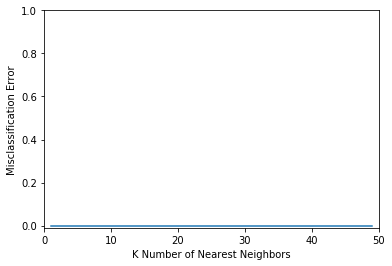

In [15]:
# Plot misclassification error vs. hyperparameter K

# Misclassification error is 1-(accuracy)
MSE = [1 - x for x in cv_scores]

# Determine the best K value; "best" is the smallest K that also produces the smallest MSE
optimal_K = Kvalues[MSE.index(min(MSE))]
print "The optimal number K of neighbors is K = %d" % optimal_K

# Plot MSE vs. K
plt.plot(Kvalues, MSE)
plt.xlabel('K Number of Nearest Neighbors')
plt.ylabel('Misclassification Error')
plt.xlim(0,50)
plt.ylim(-0.01,1)
plt.show()

# Political polarization is a kick in the head, ain't it?